In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp  -r /content/drive/MyDrive/Colab_Notebooks/data/images/image_train /content
print("Ok!")
print("nombre d'images :")
!find /content/image_train/ -name '*.jpg' | wc -l

cp: cannot access '/content/drive/MyDrive/Colab_Notebooks/data/images/image_train': Input/output error
Ok!
nombre d'images :
0


In [9]:
!python --version
!find /content/image_train/ -name '*.jpg' | wc -l

Python 3.10.12
0


In [ ]:
import sys
#sys.path.append('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/src')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/src')
!pip install -r /content/drive/MyDrive/Colab_Notebooks/requirements.txt

In [ ]:
import configparser
config = configparser.ConfigParser()
#config.read('E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/Rakuten_config.ini')
config.read('/content/drive/MyDrive/Colab_Notebooks/Rakuten_config_colab.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())
print( get_RACINE_IMAGES())

E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/input/
E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

In [ ]:
df_feats.head(5)

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [ ]:
df_target.head(5)

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


In [ ]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid'])
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb enreg ", str(df.shape[0]))
df.head(5)
df_img=df.copy()

Nb enreg  84916


### test de lecture d'images

    Id                                        designation  \
2    2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
31  31                                X-Men 3 - The Movie   
34  34                              The Lord Or Thé Rings   
40  40  Mini Console De Jeux Double Joueurs 8 Bits Con...   
47  47       Shin Masoukishin Panzer Warfare (Import Jap)   

                                          description   productid     imageid  \
2   PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
31                                                NaN    49132716   874730792   
34                                                NaN  4237073471  1324384878   
40  Nom de la marque:NoEnName_Null<br />Affichage ...  4200874030  1316147329   
47                                                NaN     8870838   868167157   

    prdtypecode                                nom_image  
2            50    image_938777978_product_201115110.jpg  
31           40     image_87

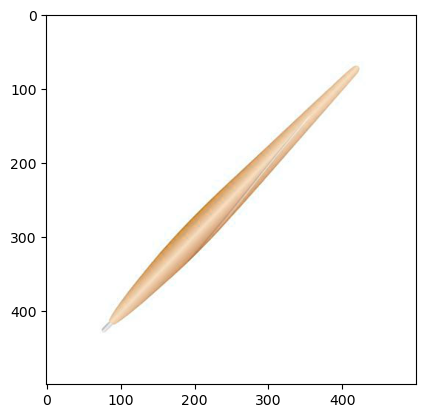

In [ ]:
import os
import cv2
import numpy as np

from PIL import Image

# Définir le chemin du dossier contenant les images
folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"

df_img=df[df['prdtypecode'].isin([40,50,60])]
print(df_img.head())

# Charger les images et les stocker dans un tableau
image_list = []


for filename in df_img['nom_image'][df_img['prdtypecode']==50]:
    #print(os.path.join(folder_path, filename))
    #image = Image.open(os.path.join(folder_path, filename))
    #image.show()
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        image_list.append(img)



# Convertir la liste d'images en un tableau numpy
images = np.array(image_list)
print(len(images))
print(images.shape)


# Afficher la première image
image=images[0,:,:,:]
plt.imshow(image)
plt.show()




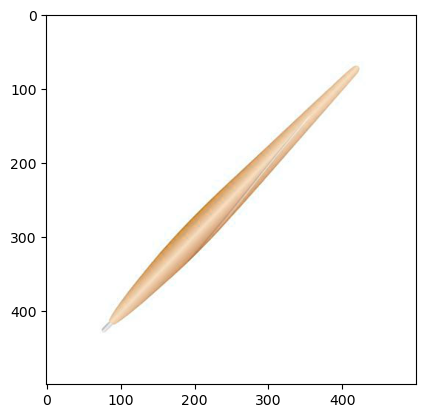

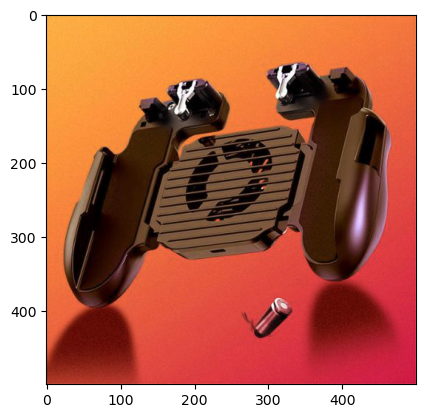

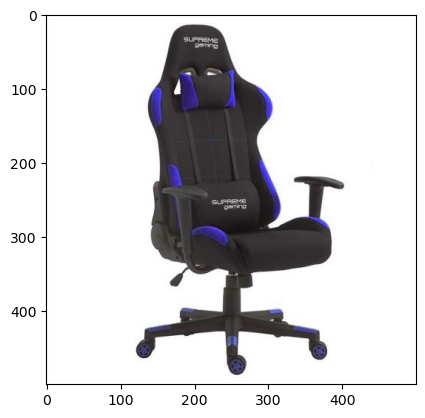

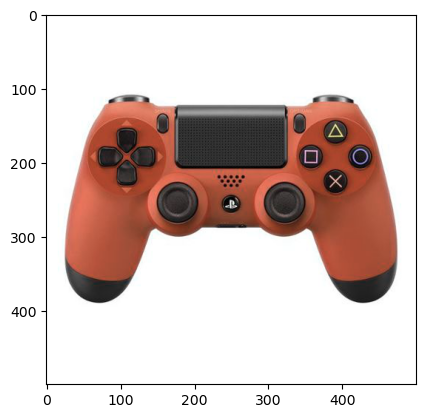

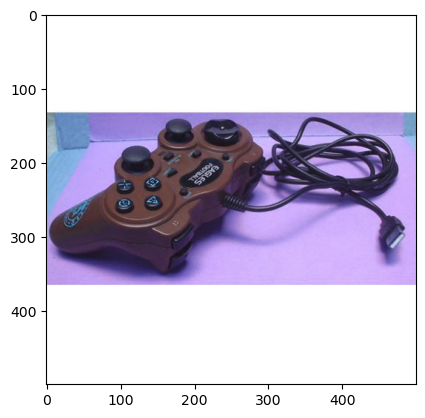

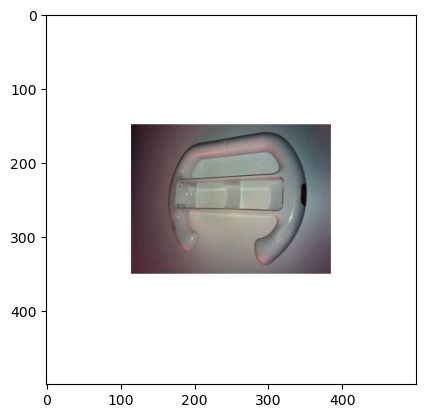

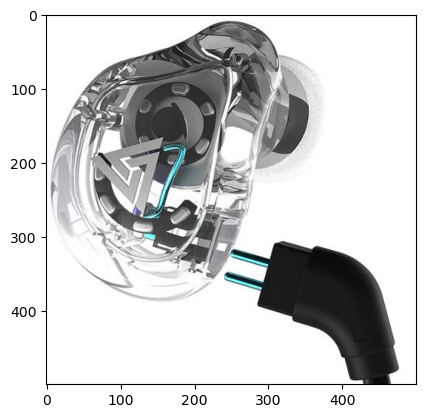

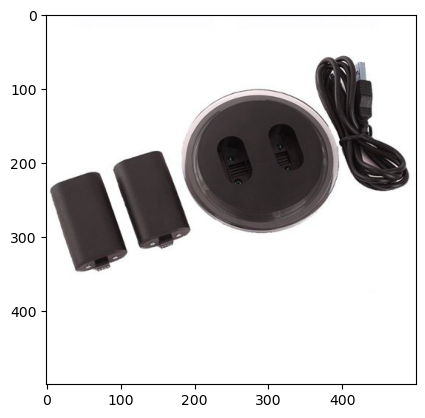

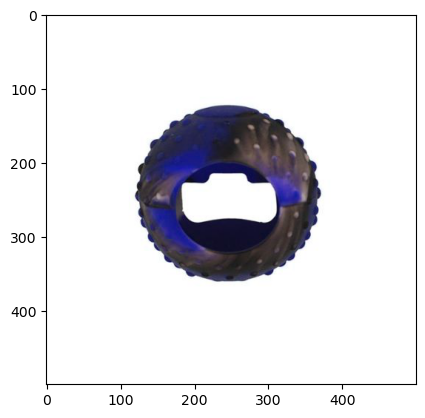

In [ ]:
for i in range(9):
    image=images[i,:,:,:]
    plt.imshow(image)
    plt.show()

### Test de contours

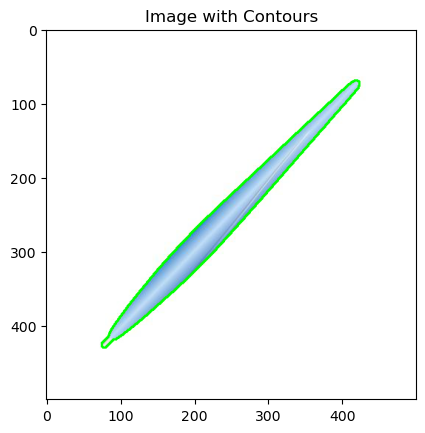

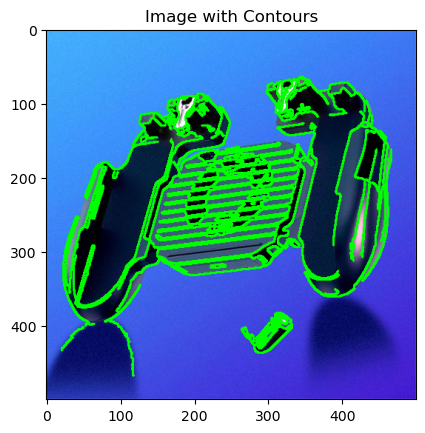

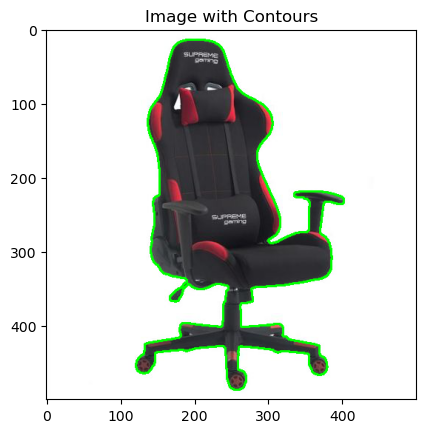

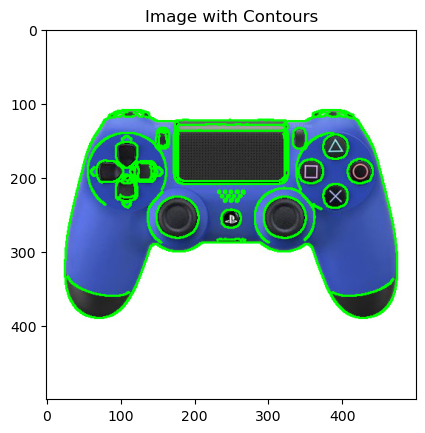

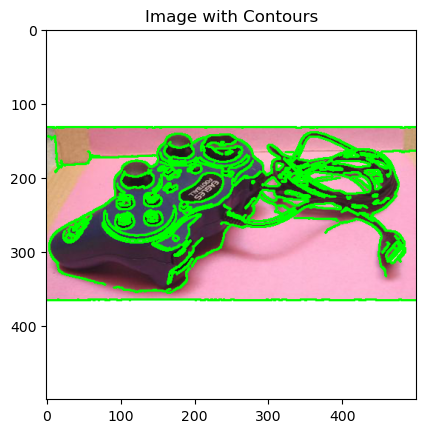

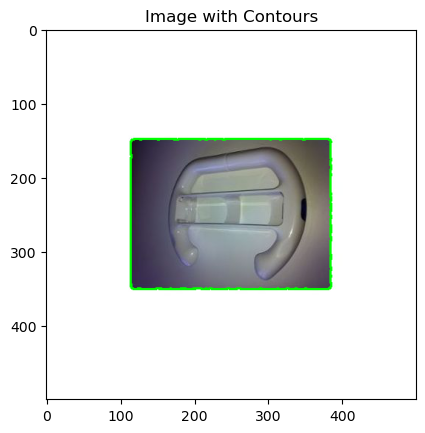

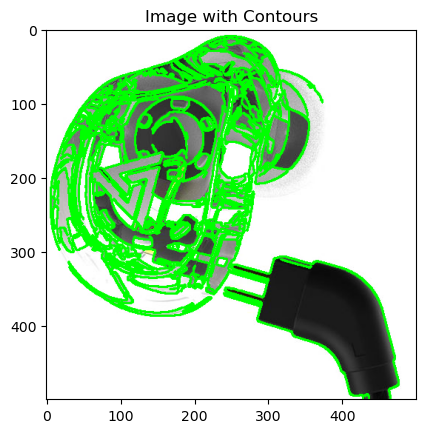

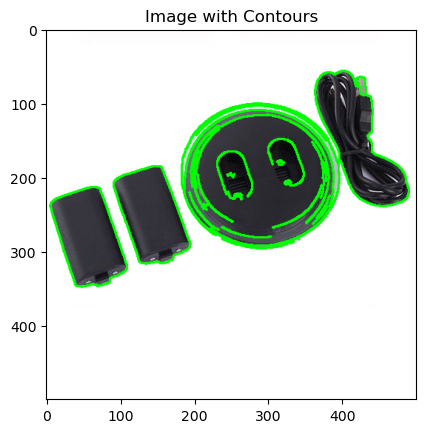

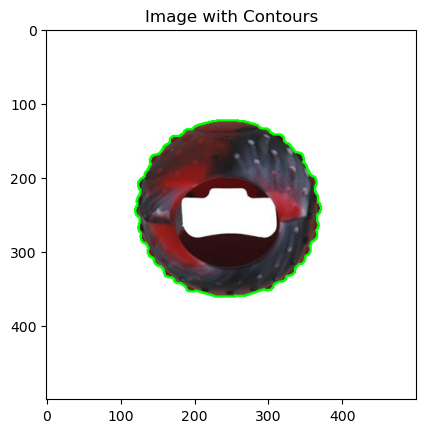

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_contours(image_path):
    # Lecture de l'image
    img = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Appliquer un flou pour réduire le bruit
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Appliquer une détection de bordure Canny
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Trouver les contours à partir des bords
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dessiner tous les contours sur l'image originale
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

    # Affichage de l'image avec les contours détectés
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title('Image with Contours')
    plt.show()


nomfic=[]
for filename in df_img['nom_image'][df_img['prdtypecode']==50]:
    nomfic.append(os.path.join(folder_path, filename))
for i in range(9):
    image=nomfic[i]
    find_contours(image)


## Test de contours et de formes

0 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_938777978_product_201115110.jpg
1 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1258507989_product_3885602739.jpg
2 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1172463223_product_2792163142.jpg
3 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1144198526_product_2476577455.jpg
4 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1194537163_product_3149281609.jpg
5 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_883950931_product_128983901.jpg
6 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1325110167_product_4240397804.jpg
7 E:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1325242825_product_4240794529.jpg
8 E:/Manuel/

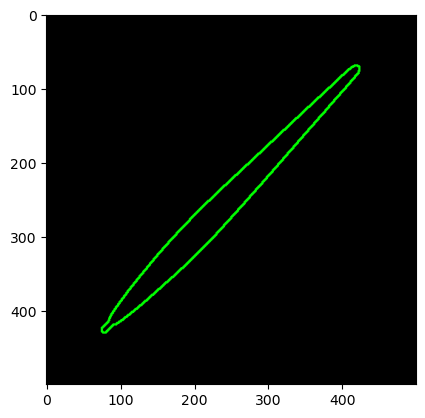

1


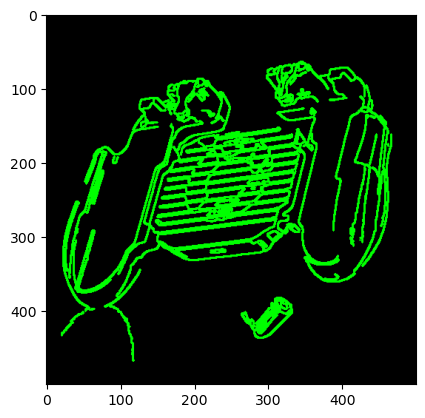

2


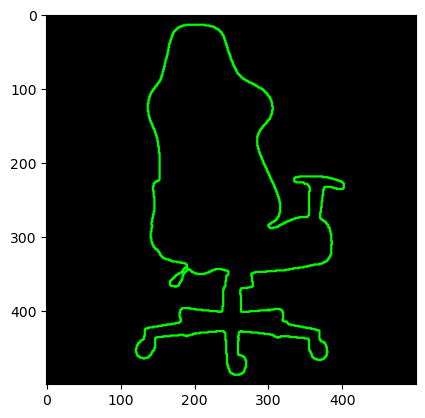

3


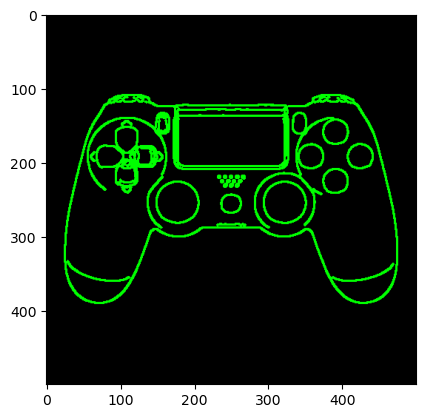

4


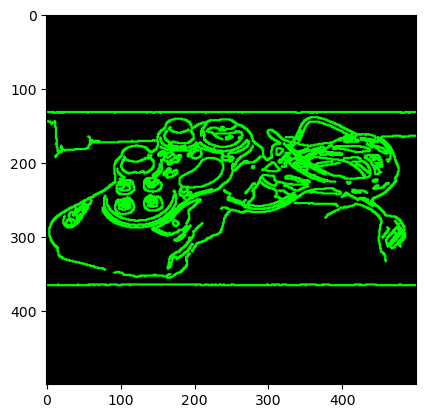

5


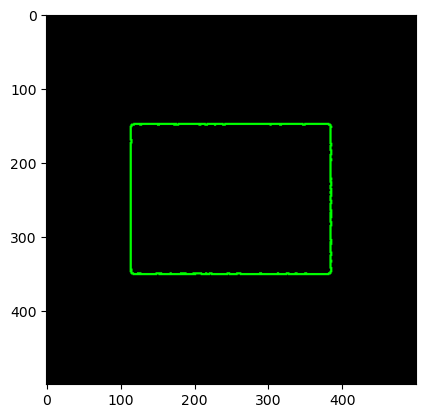

6


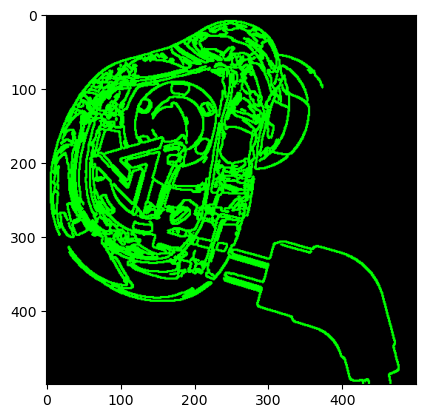

7


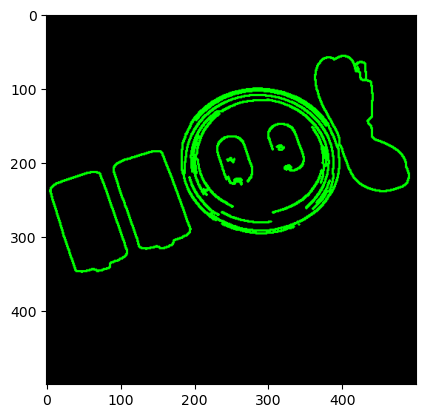

8


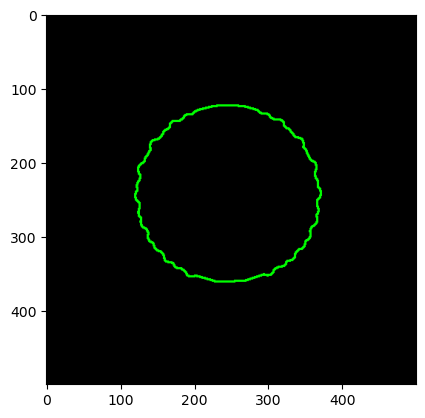

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Cimages=[]

def find_contours2(image_path):
    #print(image_path)
    # Lecture de l'image
    img = cv2.imread(image_path)
    img = np.uint8(img)

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Appliquer un flou pour réduire le bruit
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Appliquer une détection de bordure Canny
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Trouver les contours à partir des bords
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    """
    classes = {0: 'cercle', 2: 'ligne', 3: 'triangle', 4: 'rectangle', 5: 'pentagone', 6: 'hexagone'}

    for contour in contours:
        # Approximer le contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Classer la forme en fonction du nombre de sommets
        num_vertices = len(approx)
        shape = classes.get(num_vertices, "unknown")

        print("Shape: ", shape)
    """

    # Créer une image noire de la même taille que l'originale
    black_image = np.zeros(img.shape, np.uint8)

    # Dessiner les contours sur cette image noire
    cv2.drawContours(black_image, contours, -1, (0, 255, 0), 2)

    # Affichage de l'image avec les contours détectés
    Cimages.append(black_image)
    #plt.imshow(cv2.cvtColor(black_image, cv2.COLOR_BGR2RGB))
    #plt.title('Contours of the Image')
    #plt.show()



nomfic=[]
for filename in df_img['nom_image'][df_img['prdtypecode']==50]:
    nomfic.append(os.path.join(folder_path, filename))
for i in range(9):
    image=nomfic[i]
    find_contours2(image)
    print(i,image)
for i in range(9):
    print(i)
    plt.imshow(cv2.cvtColor(Cimages[i], cv2.COLOR_BGR2RGB))
    plt.show()


## Images moyenne par Catégorie

10 livres
500 500
40 jeux video pour pc et consoles
500 500
50  accesoires jeux video
500 500
60 consoles de jeux video
500 500
1140 produits derives “geeks” et figurines
500 500
1160 cartes collectionables
500 500
1180 figurines collectionables pour jeux de societe
500 500
1280 jouets, peluches, poupees
500 500
1281 jeux de societe/cartes
500 500
1300 Petites voitures (jouets) et maquettes
500 500
1301 accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)
500 500
1302 jeux d'exterieur
500 500
1320 sacs pour femmes et accesore petite enfance
500 500
1560 Mobilier et produits decoration/rangement pour la maison
500 500
1920 linge de maison (cousins, rideaux, serviettes, nappes, draps)
500 500
1940 nouriture (cafes,infusions,conserves, epices,etc)
500 500
2060 lampes et accesoires decoration pour maison
500 500
2220 accesoires mascots/pets
500 500
2280 magazines
500 500
2403 livres et bds
500 500
2462 consoles de jeux video et jeux videos
500 500
2522 pro

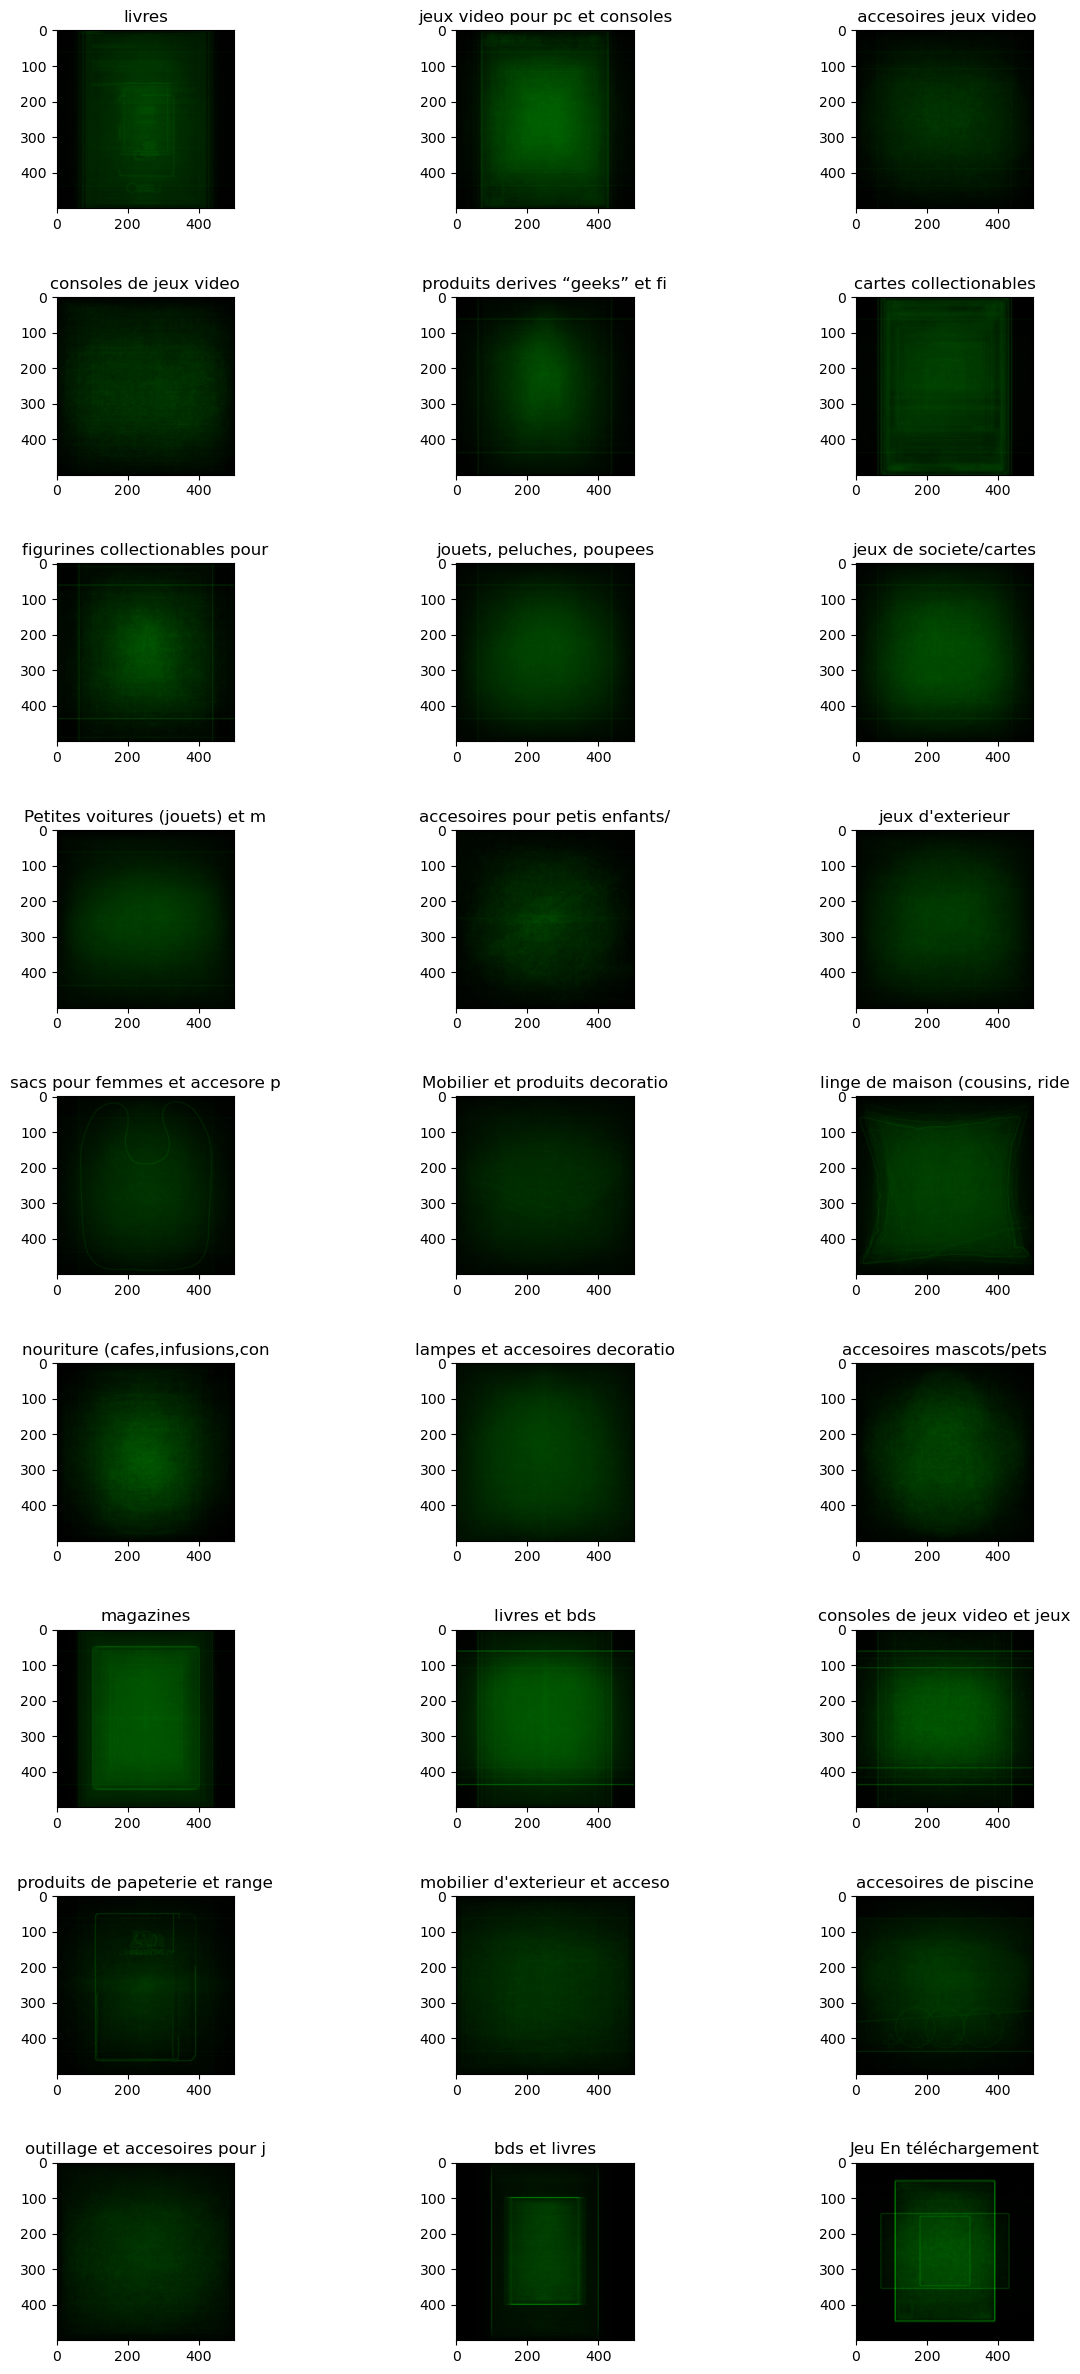

In [ ]:
import os
import cv2
import numpy as np

folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
df_img=df.copy()
Dfhisto=pd.DataFrame()
fig, axs = plt.subplots(9, 3, figsize=(15,30))
for c,ax in zip(cat,axs.flat):
    print(c,catdict[c])
    Cimages = []
    for filename in df_img[df_img['prdtypecode']==c]['nom_image']:
        find_contours2(os.path.join(folder_path, filename))
    #print("Nb fichiers ",len(fichiers_images))
    # Lisez la première image pour obtenir la taille
    premiere_image =  Cimages[0]
    hauteur, largeur, _ = premiere_image.shape

    print(hauteur, largeur)
    #print(len(fichiers_images))

    # Créez un tableau numpy pour stocker la somme de toutes les images
    somme_images = np.zeros((hauteur, largeur, 3), np.float32)

    # Parcourez chaque image
    for fichier_image in Cimages:
        # Lisez l'image
        image = fichier_image

        # Ajoutez cette image à la somme des images
        somme_images = somme_images + image

    #print("etape 1")
    # Calculez la moyenne des images en divisant la somme par le nombre d'images
    moyenne_images = somme_images / len(Cimages)
    #print("etape 2")
    # Assurez-vous que les valeurs sont de type int, car les pixels ne peuvent pas avoir de valeurs fractionnaires
    moyenne_images = np.array(np.round(moyenne_images), dtype=np.uint8)
    ax.set_title( catdict[c][:30])
    ax.imshow(moyenne_images)

plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()